# Part b: Suppose the input graph G = (V, E) is stored in an array of adjacency lists and we use a minimizing heap for the priority queue.

In [4]:
import heapq
import random

def create_adjacency_list_onePath(num_nodes):
    adjacency_list = {}
    for i in range(num_nodes - 1):
        u = str(i)
        v = str(i + 1)
        weight = 1  # You can adjust the weight as needed
        if u not in adjacency_list:
            adjacency_list[u] = []
        if v not in adjacency_list:
            adjacency_list[v] = []
        adjacency_list[u].append((v, weight))
        adjacency_list[v].append((u, weight))  # If the graph is undirected
    return adjacency_list
    
# def create_adjacency_list_random(num_nodes, num_edges):
#     edges = []
#     for edge in range(num_edges):
#         u = str(random.randint(0, num_nodes - 1))
#         v = str(random.randint(0, num_nodes - 1))
#         weight = 1  # Random weight between 1 and 10 (you can adjust this range)
#         edges.append((u, v, weight))
#     adjacency_list = {}
#     for edge in edges:
#         u, v, weight = edge
#         if u not in adjacency_list:
#             adjacency_list[u] = []
#         if v not in adjacency_list:
#             adjacency_list[v] = []
#         if (u, weight) not in adjacency_list[v]:
#             adjacency_list[u].append((v, weight))
#             adjacency_list[v].append((u, weight))  # If the graph is undirected
#     return adjacency_list

def create_adjacency_list_random(num_nodes):
    edges = []
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            weight = 1  # Random weight between 1 and 10 (you can adjust this range)
            edges.append((str(i), str(j), weight))
    adjacency_list = {}
    for edge in edges:
        u, v, weight = edge
        if u not in adjacency_list:
            adjacency_list[u] = []
        if v not in adjacency_list:
            adjacency_list[v] = []
        adjacency_list[u].append((v, weight))
        adjacency_list[v].append((u, weight))  # If the graph is undirected
    return adjacency_list


def create_adjacency_list_fullyConnected(num_nodes):
    adjacency_list = {}
    for i in range(num_nodes):
        u = str(i)
        adjacency_list[u] = []
        for j in range(num_nodes):
            if i != j:
                v = str(j)
                weight = 1  # You can adjust the weight as needed
                adjacency_list[u].append((v, weight))
    return adjacency_list

def dijkstra(graph, source):
    distances = {vertex: float('inf') for vertex in graph}
    distances[source] = 0
    
    priority_queue = [(0, source)]
    
    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)
        
        if current_distance > distances[current_vertex]:
            continue
        
        for neighbor, weight in graph[current_vertex]:
            distance = current_distance + weight
            
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
    
    return distances

In [141]:
# edges = [
#     ('A', 'B', 1),
#     ('A', 'C', 4),
#     ('B', 'C', 2),
#     ('B', 'D', 5),
#     ('C', 'D', 1)
# ]


graph_adjacency_list = create_adjacency_list_random(50,30)
#print(graph_adjacency_list)
source_vertex = '1'
#print(type(source_vertex))
shortest_distances = dijkstra(graph_adjacency_list, source_vertex)
#print(shortest_distances)

 Now we have completed the function with array for adjacency matrix, lets find the time complexity using average, best and worst cases of matrices. To do that we shall first import our generated graphs.

In [10]:
import time

In [8]:
# Function to generate a graph with V vertices and E edges, and measure the execution time of Dijkstra's algorithm
def time_dijkstra(graph):

    start_time = time.time()
    comparisons = dijkstra(graph, '0')
    end_time = time.time()

    return (end_time - start_time)

In [93]:
# Import Libraries
import numpy as np
import pandas as pd
import sys
import timeit
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
times = []
for V in range (100,2000):
    graph = create_adjacency_list_random(V)    
    times.append(time_dijkstra(graph))

print(times)

In [19]:
random_time = []
# for E in range(2000,7100):
#     graph = create_adjacency_list_random(500, E)    
#     random_time.append(time_dijkstra(graph))

# print(sum(random_time_edges)/5100)

for V in range(1000):
    graph = create_adjacency_list_onePath(10)    
    random_time.append(time_dijkstra(graph))
print(sum(random_time)/1000)

3.981184959411621e-05


In [36]:
random_time = []

for V in range(1000):
    graph = create_adjacency_list_fullyConnected(10)    
    random_time.append(time_dijkstra(graph))
print(sum(random_time)/1000)

6.342124938964843e-05


In [43]:
random_time = []

for V in range(1000):
    graph = create_adjacency_list_random(10)    
    random_time.append(time_dijkstra(graph))
print(sum(random_time)/1000)

6.40411376953125e-05


In [51]:
random_time_best = []

for V in range(1000):
    graph = create_adjacency_list_onePath(100)    
    random_time_best.append(time_dijkstra(graph))
print(sum(random_time_best)/1000)

0.0002627606391906738


In [52]:
random_time = []

for V in range(1000):
    graph = create_adjacency_list_random(100)    
    random_time.append(time_dijkstra(graph))
print(sum(random_time)/1000)

KeyboardInterrupt: 

In [249]:
random_time_best = []

for V in range(1000):
    graph = create_adjacency_list_fullyConnected(100)    
    random_time_best.append(time_dijkstra(graph))
print(sum(random_time_best)/1000)

0.004611135244369507


In [250]:
random_time_best = []

for V in range(1000):
    graph = create_adjacency_list_onePath(1000)    
    random_time_best.append(time_dijkstra(graph))
print(sum(random_time_best)/1000)

0.0029500222206115725


In [258]:
random_time = []

for V in range(10):
    graph = create_adjacency_list_random(1000)    
    random_time.append(time_dijkstra(graph))
print(sum(random_time)/10)

0.5191574335098267


In [257]:
random_time_best = []

for V in range(10):
    graph = create_adjacency_list_fullyConnected(1000)    
    random_time_best.append(time_dijkstra(graph))
print(sum(random_time_best)/10)

0.4460029363632202


In [259]:
random_time_best = []

for V in range(10):
    graph = create_adjacency_list_onePath(10000)    
    random_time_best.append(time_dijkstra(graph))
print(sum(random_time_best)/10)

0.03216242790222168


In [ ]:
random_time = []

# for V in range(10):
graph = create_adjacency_list_random(10000)    
random_time.append(time_dijkstra(graph))
# print(sum(random_time)/10)

In [ ]:
random_time_best = []

# for V in range(10):
graph = create_adjacency_list_fullyConnected(10000)    
random_time_best.append(time_dijkstra(graph))
# print(sum(random_time_best)/10)

In [18]:
# bestCase10 = pd.read_csv("bestCase10_adjList.csv")
# avgCase10 = pd.read_csv("avgCase10_adjList.csv")
# worstCase10 = pd.read_csv("worstCase10_adjList.csv")

# bestCase100 = pd.read_csv("bestCase100_adjList.csv")
# avgCase100 = pd.read_csv("avgCase100_adjList.csv")
# worstCase100 = pd.read_csv("worstCase100_adjList.csv")

# bestCase1000 = pd.read_csv("bestCase1000_adjList.csv")
# avgCase1000 = pd.read_csv("avgCase1000_adjList.csv")
# worstCase1000 = pd.read_csv("worstCase1000_adjList.csv")

# bestCase10K = pd.read_csv("bestCase10K_adjList.csv")
# avgCase10K = pd.read_csv("avgCase10K_adjList.csv")
# worstCase10K = pd.read_csv("worstCase10K_adjList.csv")

# best10 = np.array(((pd.DataFrame(bestCase10).iloc[: , 1:]).values.tolist()))
# avg10 = np.array(((pd.DataFrame(avgCase10).iloc[: , 1:]).values.tolist()))
# worst10 = np.array(((pd.DataFrame(worstCase10).iloc[: , 1:]).values.tolist()))

# best100 = np.array(((pd.DataFrame(bestCase100).iloc[: , 1:]).values.tolist()))
# avg100 = np.array(((pd.DataFrame(avgCase100).iloc[: , 1:]).values.tolist()))
# worst100 = np.array(((pd.DataFrame(worstCase100).iloc[: , 1:]).values.tolist()))

# best1000 = np.array(((pd.DataFrame(bestCase1000).iloc[: , 1:]).values.tolist()))
# avg1000 = np.array(((pd.DataFrame(avgCase1000).iloc[: , 1:]).values.tolist()))
# worst1000 = np.array(((pd.DataFrame(worstCase1000).iloc[: , 1:]).values.tolist()))

# best10K = np.array(((pd.DataFrame(bestCase10K).iloc[: , 1:]).values.tolist()))
# avg10K = np.array(((pd.DataFrame(avgCase10K).iloc[: , 1:]).values.tolist()))
# worst10K = np.array(((pd.DataFrame(worstCase10K).iloc[: , 1:]).values.tolist()))

best10 = np.array(pd.DataFrame(bestCase10).iloc[:, 1:].values)
avg10 = np.array(pd.DataFrame(avgCase10).iloc[:, 1:].values)
worst10 = np.array(pd.DataFrame(worstCase10).iloc[:, 1:].values)

best100 = np.array(pd.DataFrame(bestCase100).iloc[:, 1:].values)
avg100 = np.array(pd.DataFrame(avgCase100).iloc[:, 1:].values)
worst100 = np.array(pd.DataFrame(worstCase100).iloc[:, 1:].values)

best1000 = np.array(pd.DataFrame(bestCase1000).iloc[:, 1:].values)
avg1000 = np.array(pd.DataFrame(avgCase1000).iloc[:, 1:].values)
worst1000 = np.array(pd.DataFrame(worstCase1000).iloc[:, 1:].values)

best10K = np.array(pd.DataFrame(bestCase10K).iloc[:, 1:].values)
avg10K = np.array(pd.DataFrame(avgCase10K).iloc[:, 1:].values)
worst10K = np.array(pd.DataFrame(worstCase10K).iloc[:, 1:].values)

In [19]:
# Gathering timing for all graphs

# List of items to run
run_list1 = [best10,avg10,worst10]
run_list2 = [best100,avg100,worst100]
run_list3 = [best1000,avg1000,worst1000]
run_list4 = [best10K,avg10K,worst10K]

all_run = [run_list1,run_list2,run_list3,run_list4]

# List of time_lists to populate
time_list1, time_list2, time_list3, time_list4 = ([] for i in range(4))
all_time = [time_list1,time_list2,time_list3,time_list4]

# Run all 10 times for consistency
for counter in range(0,4):
    for adjList in all_run[counter]:
        time_taken = 0;
        avg_time = 0;
        for i in range(0,1000):
            start1 = timeit.default_timer()
            dijkstra(adjList,0)
            run_time = timeit.default_timer()-start1
            time_taken += run_time
        avg_time = time_taken/1000
        all_time[counter].append(avg_time)

In [20]:
case = ['Best', 'Average', 'Worst']
results = pd.DataFrame({'10': time_list1, '100': time_list2, '1K': time_list3, '10K': time_list4, 'Case': case}, columns=['10', '100', '1K', '10K', 'Case'])
results.head()

,10,100,1K,10K,Case
0,0.000005,0.000030,0.000293,0.002902,Best
1,0.000005,0.000030,0.000293,0.002893,Average
2,0.000005,0.000029,0.000295,0.002895,Worst


In [13]:
results.columns[0]

'10'

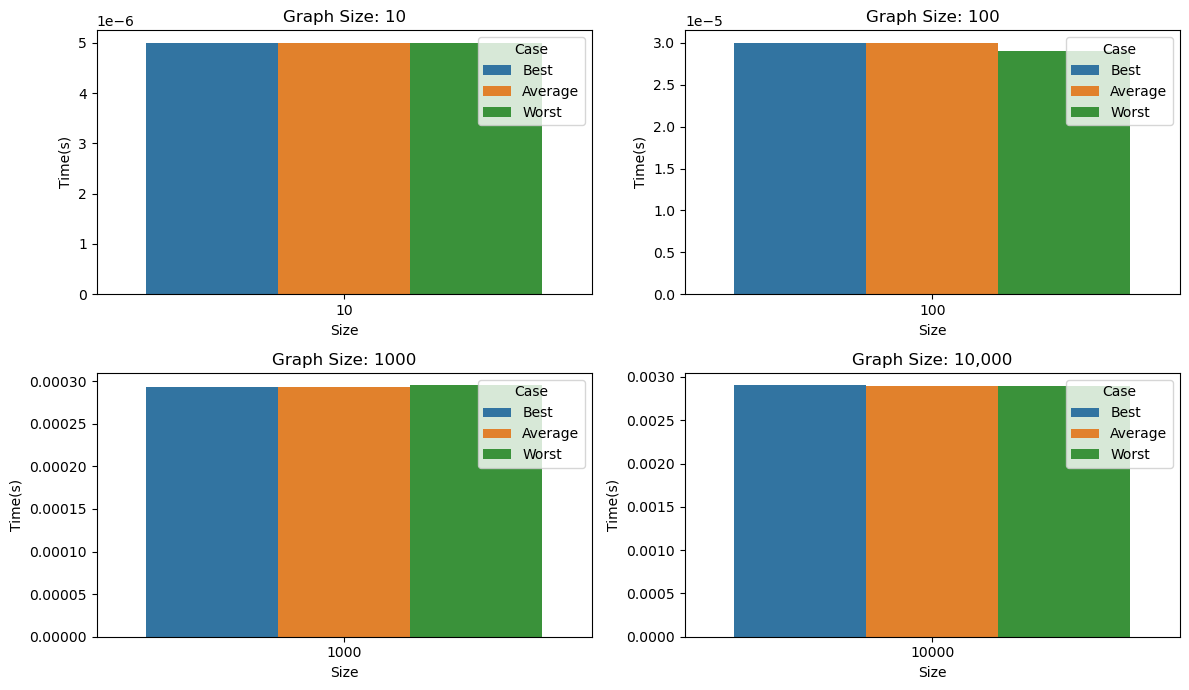

In [21]:
x = [10, 10, 10, 100, 100, 100, 1000, 1000, 1000, 10000, 10000, 10000]
y = [0.000005, 0.000005, 0.000005, 0.000030, 0.000030, 0.000029, 0.000293, 0.000293, 0.000295, 0.002902, 0.002893, 0.002895]
z = ['Best', 'Average', 'Worst','Best', 'Average', 'Worst','Best', 'Average', 'Worst','Best', 'Average', 'Worst']

results = pd.DataFrame({'Size': x, 'Time(s)': y, 'Case': z}, columns=['Size', 'Time(s)', 'Case'])
results_10 = results[results["Size"] == 10]
results_100 = results[results["Size"] == 100]
results_1k = results[results["Size"] == 1000]
results_10k = results[results["Size"] == 10000]
fig, axs = plt.subplots(2, 2, figsize=(12, 7))


axs[0, 0].set_title("Graph Size: 10")
axs[0, 1].set_title("Graph Size: 100")
axs[1, 0].set_title("Graph Size: 1000")
axs[1, 1].set_title("Graph Size: 10,000")



sb.barplot(data=results_10, y="Time(s)", x="Size", hue="Case", ax=axs[0, 0])
sb.barplot(data=results_100, y="Time(s)", x="Size", hue="Case", ax=axs[0, 1])
sb.barplot(data=results_1k, y="Time(s)", x="Size", hue="Case", ax=axs[1, 0])
sb.barplot(data=results_10k, y="Time(s)", x="Size", hue="Case", ax=axs[1, 1])

plt.tight_layout()